<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_OB_week2_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **7.5** 부스팅

- **부스팅**boosting(가설 부스팅): 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법- **부스팅**boosting(가설 부스팅): 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법
- **에이다부스트**(AdaBoost), **그레이디언트 부스팅**(gradient boosting)

##### **7.5.1 에이타부스트**

- 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 것 => 새로운 예측기가 학습하기 어려운 샘플에 점점 더 맞춰지게 됨

1. 알고리즘 기반이 되는 첫 번째 분류기를 훈련 세트에서 훈련시키고 예측을 만듦
2. 알고리즘이 잘못 분류된 훈련 샘플의 가중치를 상대적으로 높임
3. 두 번째 분류기는 업데이트된 가중치를 사용해 훈련 세트에서 훈련하고 다시 예측을 만듦
4. 다시 가중치를 업데이트 (반복)

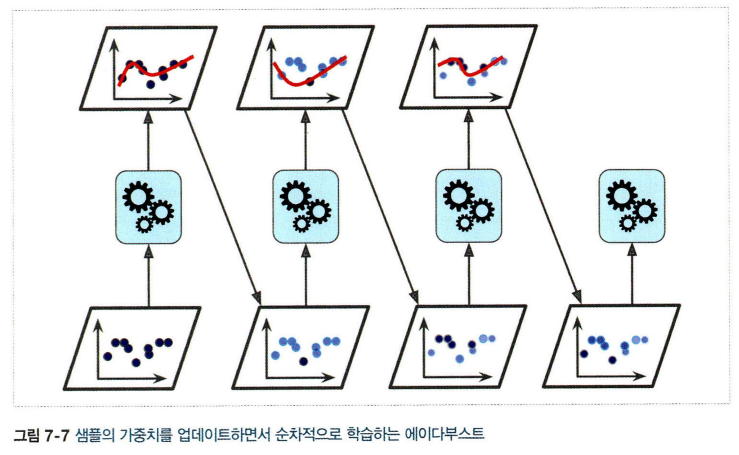

- 경사하강법: 비용 함수를 최소화하기 위해 한 예측기의 모델 파라미터를 조정
- 에이다부스트: 점차 더 좋아지도록 앙상블에 예측기를 추가
- 모든 예측기가 훈련 마치면 앙상블 => *배깅/페이스팅과 비슷한 방식*으로 예측을 만듦
- 가중치가 적용된 훈련 세트의 전반적인 정확도에 따라 *예측기마다 다른 가중치* 적용

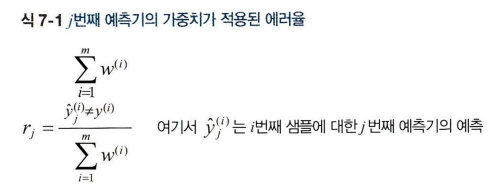


- 각 샘플 가중치 *w*는 초기에 *1/m*로 초기화
- 첫 번째 예측기가 학습, 가중치가 적용된 에러율 *r1*이 훈련 세트에 대해 계산

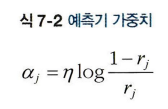

- 예측기가 정확할수록 가중치가 더 높아짐
- 무작위 예측 => 가중치 0에 수렴
- 무작위 추측보다 정확도 낮음 => 가중치 음수

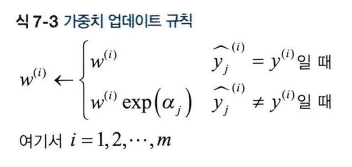

- 가중치 업데이트 규칙에 따라 샘플의 가중치 업데이트
- 잘못 분류된 샘플의 가중치가 증가

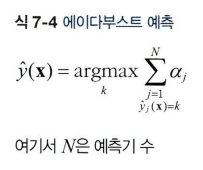

- 모든 샘플의 가중치 정규화
- 새 예측기가 업데이트된 가중치 사용해 훈련 <=> 전체 과정 반복

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

#5장에서 소개한 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators=200,
    algorithm='SAMME', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

##### **7.5.2 그레이디언트 부스팅**

- 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가
- 이전 예측기가 만든 **잔여 오차**residual error에 새로운 예측기를 학습
- **그레이디언트 트리 부스팅**gradient tree boosting / **그레이디언트 부스티드 회귀 트리**gradient boosted regression tree(GBRT)

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [4]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [5]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [7]:
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

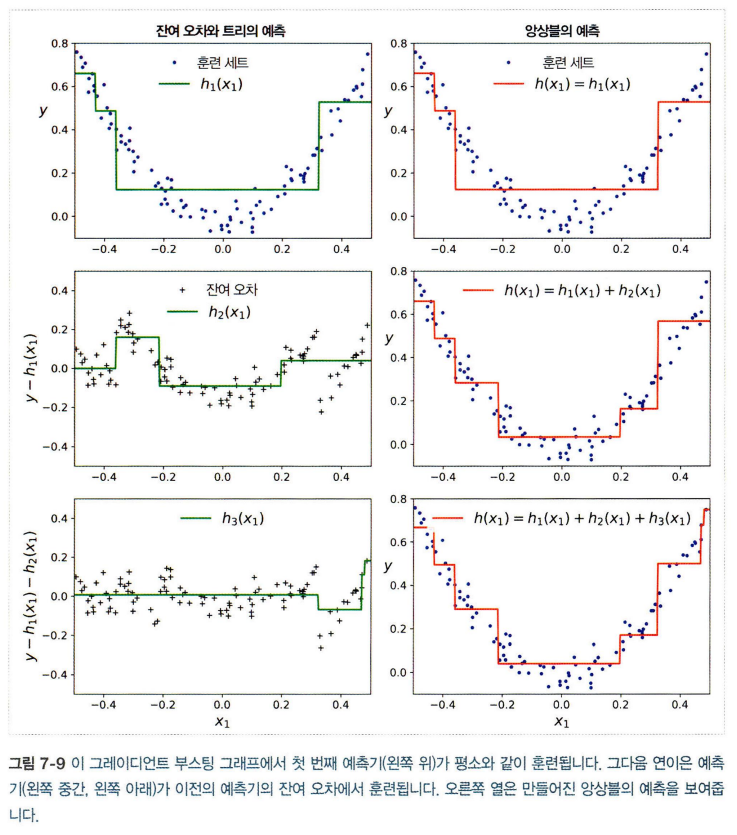

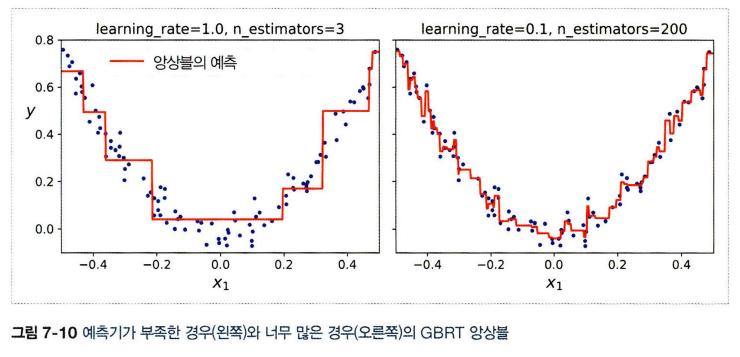

- **축소**shrinkage: learning rate(트리 기여 정도)를 낮게 설정하면 앙상블을 훈련 세트에 학습시키기 위해 많은 트리가 필요하지만 일반적으로 예측의 성능은 좋아짐
- *왼쪽*: 훈련 세트를 학습하기에는 트리가 충분X
- *오른쪽*: 트리가 너무 많아 훈련 세트에 과대적합

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

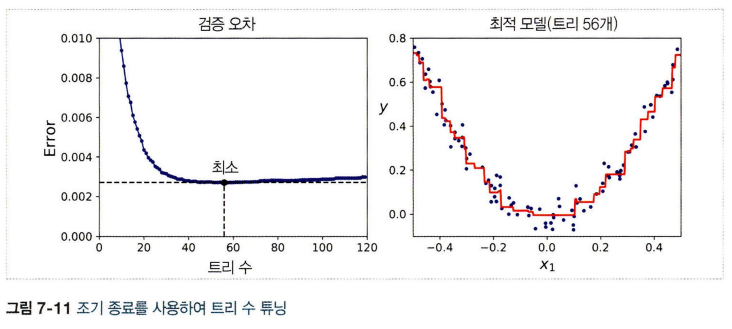

In [10]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료

**확률적 그레이디언트 부스팅**stochastic gradient boosting: *GradientBoostingRegressor*로 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정하여 subsample 매개변수 지원 => 편향이 높아지는 대신 분산이 낮아지며 훈련 속도 증가

In [11]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [13]:
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds = 2)
xgb_reg.fit(X_train, y_train,
            eval_set = [(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.41005
[1]	validation_0-rmse:0.35999
[2]	validation_0-rmse:0.33538
[3]	validation_0-rmse:0.32602
[4]	validation_0-rmse:0.32435
[5]	validation_0-rmse:0.32608
[6]	validation_0-rmse:0.31832
[7]	validation_0-rmse:0.31611
[8]	validation_0-rmse:0.31463
[9]	validation_0-rmse:0.31404
[10]	validation_0-rmse:0.31348
[11]	validation_0-rmse:0.31315
[12]	validation_0-rmse:0.31295
[13]	validation_0-rmse:0.31190
[14]	validation_0-rmse:0.31127
[15]	validation_0-rmse:0.31075
[16]	validation_0-rmse:0.31027
[17]	validation_0-rmse:0.30983
[18]	validation_0-rmse:0.30954
[19]	validation_0-rmse:0.30933
[20]	validation_0-rmse:0.30899
[21]	validation_0-rmse:0.30868
[22]	validation_0-rmse:0.30842
[23]	validation_0-rmse:0.30818
[24]	validation_0-rmse:0.30798
[25]	validation_0-rmse:0.30781
[26]	validation_0-rmse:0.30771
[27]	validation_0-rmse:0.30759
[28]	validation_0-rmse:0.30753
[29]	validation_0-rmse:0.30747
[30]	validation_0-rmse:0.30743
[31]	validation_0-rmse:0.30743
[32]	validation_0-



---

#### **7.6** 스태킹

- '앙상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수를 사용하는 대신 취합하는 모델을 훈련시킬 수 없을까?'
- 마지막 예측기(**블렌더**blender / **메타학습기**meta learner)
- 홀드 아웃(hold-out) 세트 사용
- 첫 번째 서브셋을 첫 번째 레이어 예측 훈련 위해 사용

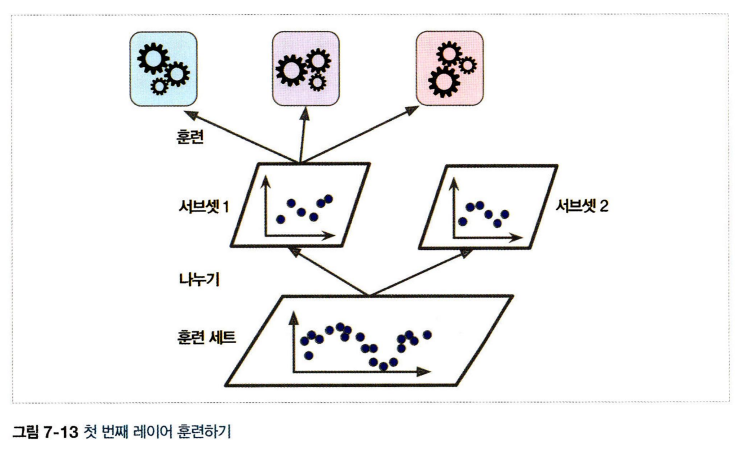

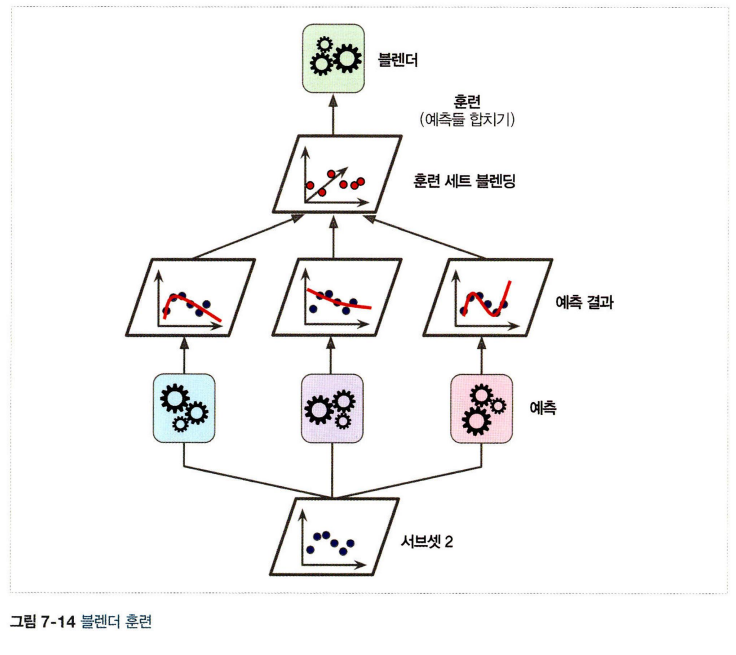

- 블렌더 여러 개 훈련 => 블렌더만의 레이어
- 각 레이어를 차례대로 실행해서 새로운 샘플에 대한 예측 만듦

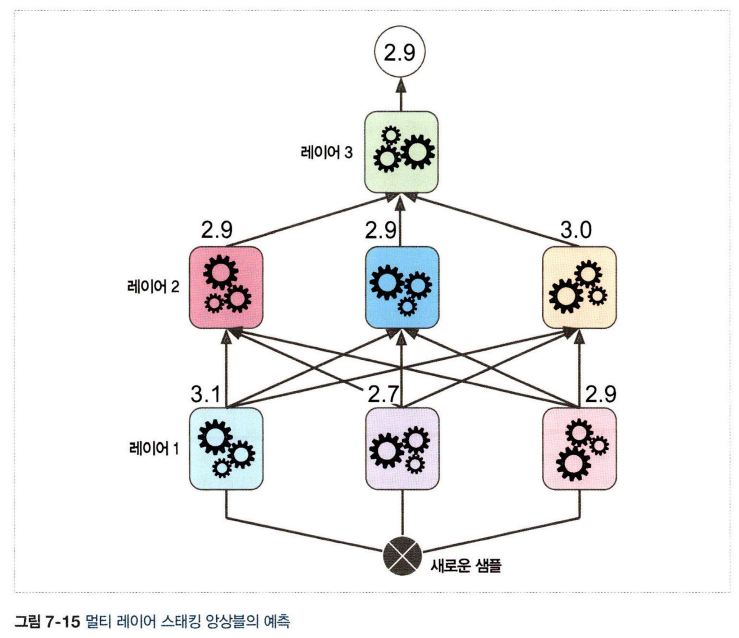